## Quantum walk on the line with customized coin

In [1]:
import hiperwalk as hpw
import numpy as np
from scipy.linalg import block_diag

### Defining the graph and the QW instance

The next command creates a line, which is an instance of the Graph class.

In [2]:
N = 101 # number of vertices
line = hpw.Line(N)

The next command creates a QW on the line, which is an instance of the Coined class.

In [3]:
Y = np.matrix([[1,1j],[1j,1]])/np.sqrt(2)
qw = hpw.Coined(line, coin=block_diag(1,*[Y for _ in range(N-2)],1))

This coin is described by equation (17) in <a href="https://arxiv.org/abs/quant-ph/0303081">Kempe's introductory overview</a>.

### Setting the initial state in the center

In [4]:
ini_state = qw.uniform_state([N//2])

### Probability distribution after $\frac{N}{2}$ steps

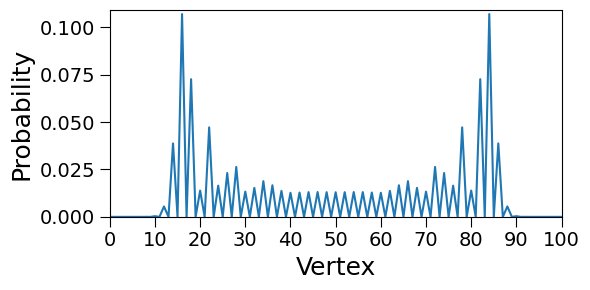

In [5]:
final_state = qw.simulate(range = (N//2,N//2+1), state = ini_state)
probs = qw.probability_distribution(final_state)
hpw.plot_probability_distribution(probs, plot='line', figsize=(6,3))

### Changing the labels

We can change the labels of the vertices by using a Python dictionary.

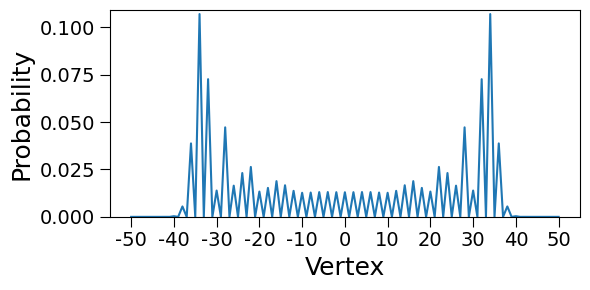

In [6]:
labels = {i: i - N // 2 for i in range(0, N, N//10)}
hpw.plot_probability_distribution(probs, plot='line', figsize=(6,3), labels=labels)

### Animation of the Hadamard quantum walk

In [7]:
list_of_states = qw.simulate(range = (10,N//2), state = ini_state)
list_of_probs = qw.probability_distribution(list_of_states)
hpw.plot_probability_distribution(list_of_probs, plot='line',animate=True,figsize=(6,3),labels=labels)